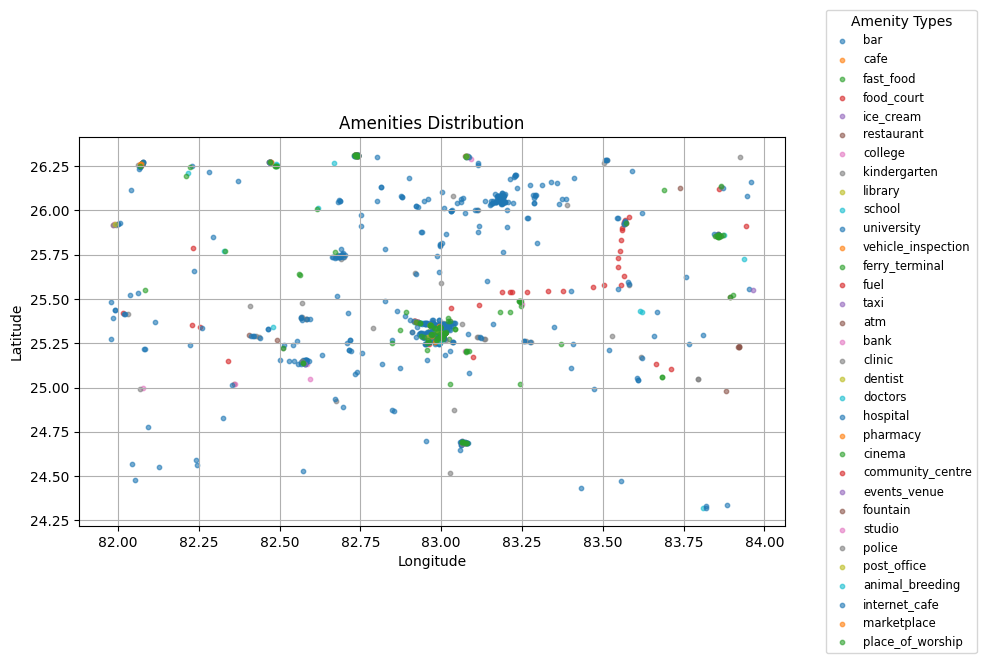

In [ ]:
import csv
import matplotlib.pyplot as plt

def plot_amenities(filename):
    # Dictionary to store latitude and longitude by amenity type
    data = {}

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            amenity_type = row['Amenity Type']
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])

            # Store the data in the dictionary
            if amenity_type not in data:
                data[amenity_type] = {'lat': [], 'lon': []}
            data[amenity_type]['lat'].append(lat)
            data[amenity_type]['lon'].append(lon)

    # Plot the data
    plt.figure(figsize=(10, 6))
    for amenity_type, coords in data.items():
        plt.scatter(coords['lon'], coords['lat'], label=amenity_type, alpha=0.6, s=10)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Amenities Distribution')
    plt.grid(True)

    # Display the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, fontsize='small', title='Amenity Types')

    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file
plot_amenities('amenities_varanasi_filtered.csv')


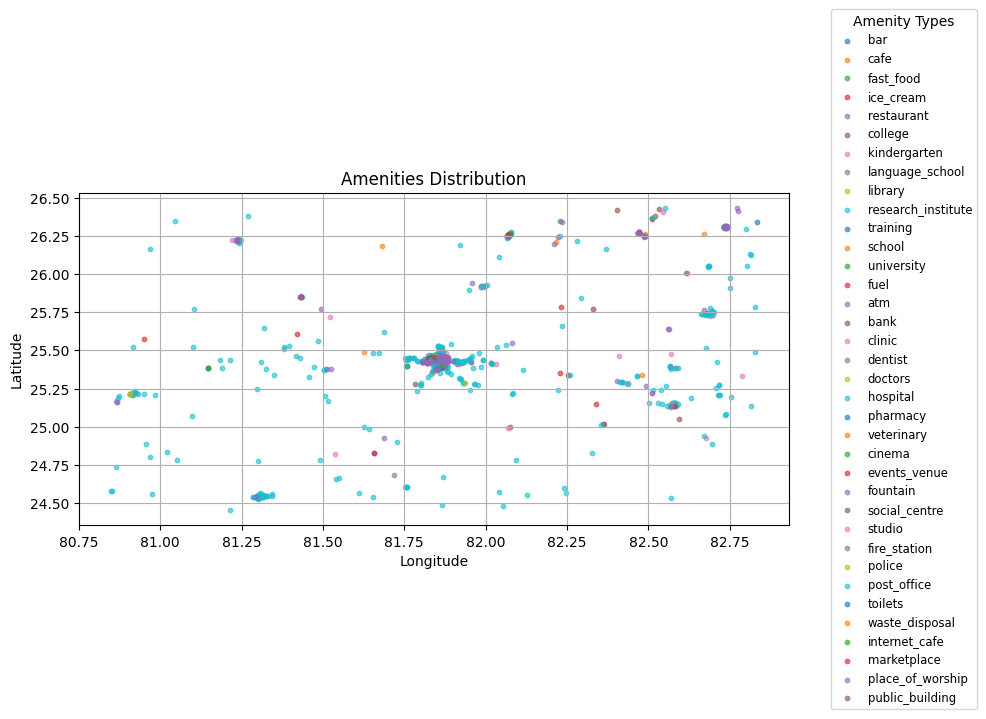

In [ ]:
import csv
import matplotlib.pyplot as plt

def plot_amenities(filename):
    # Dictionary to store latitude and longitude by amenity type
    data = {}

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            amenity_type = row['Amenity Type']
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])

            # Store the data in the dictionary
            if amenity_type not in data:
                data[amenity_type] = {'lat': [], 'lon': []}
            data[amenity_type]['lat'].append(lat)
            data[amenity_type]['lon'].append(lon)

    # Plot the data
    plt.figure(figsize=(10, 6))
    for amenity_type, coords in data.items():
        plt.scatter(coords['lon'], coords['lat'], label=amenity_type, alpha=0.6, s=10)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Amenities Distribution')
    plt.grid(True)

    # Display the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, fontsize='small', title='Amenity Types')

    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file
plot_amenities('amenities_prayagraj_filtered.csv')


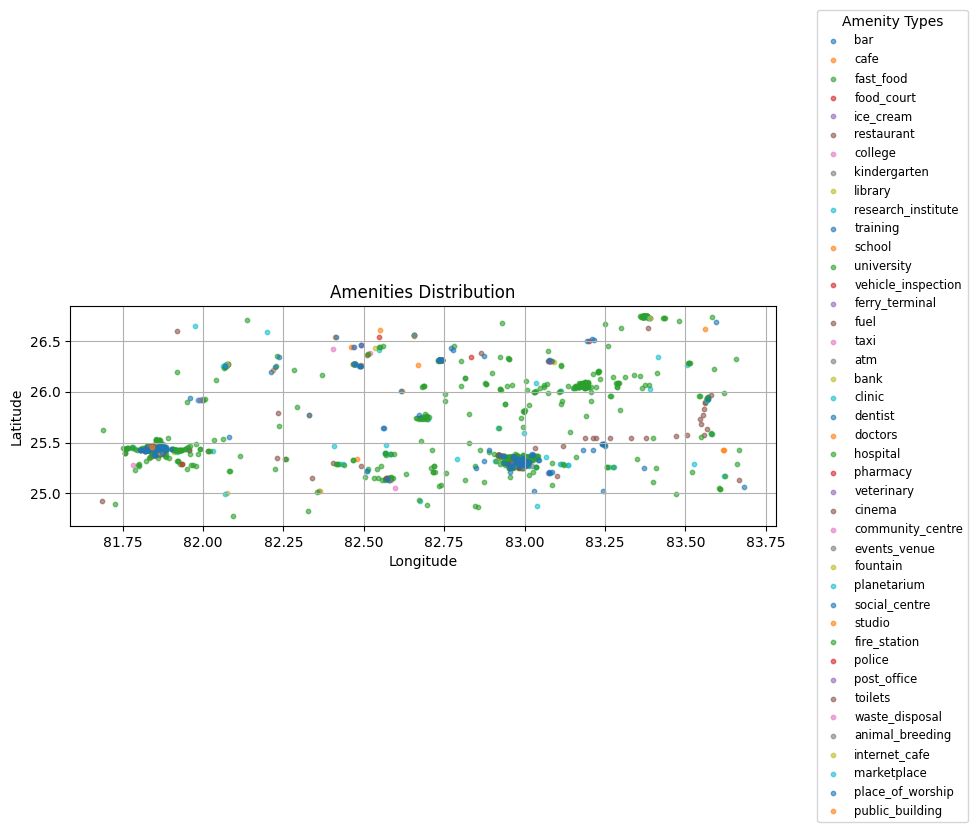

In [ ]:
import csv
import matplotlib.pyplot as plt

def plot_amenities(filename):
    # Dictionary to store latitude and longitude by amenity type
    data = {}

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            amenity_type = row['Amenity Type']
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])

            # Store the data in the dictionary
            if amenity_type not in data:
                data[amenity_type] = {'lat': [], 'lon': []}
            data[amenity_type]['lat'].append(lat)
            data[amenity_type]['lon'].append(lon)

    # Plot the data
    plt.figure(figsize=(10, 6))
    for amenity_type, coords in data.items():
        plt.scatter(coords['lon'], coords['lat'], label=amenity_type, alpha=0.6, s=10)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Amenities Distribution')
    plt.grid(True)

    # Display the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, fontsize='small', title='Amenity Types')

    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file
plot_amenities('amenities_jaunpur_filtered.csv')


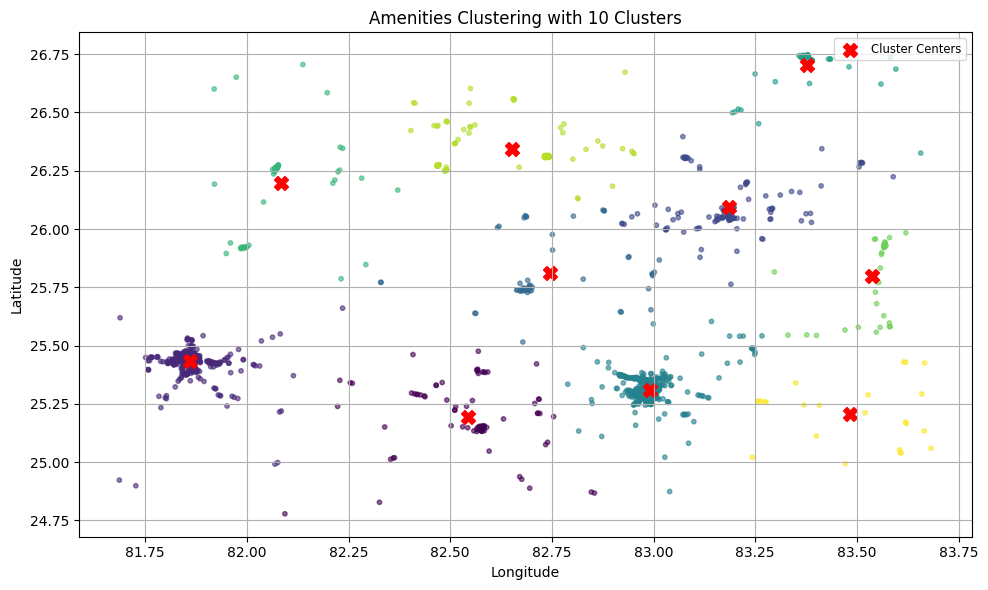

In [ ]:
import csv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def cluster_amenities(filename, n_clusters=5):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], X[:, 0], c=labels, cmap='viridis', alpha=0.6, s=10)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Amenities Clustering with {n_clusters} Clusters')
    plt.grid(True)

    # Display cluster centers
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 1], centers[:, 0], c='red', marker='X', s=100, label='Cluster Centers')

    plt.legend(loc='upper right', fontsize='small')
    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file and desired number of clusters
cluster_amenities('amenities_jaunpur_filtered.csv', n_clusters=10)


<ipython-input-15-41994a103e5e>:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[labels == label, 1], X[labels == label, 0], c=color, alpha=0.6, s=10, label=f'Cluster {label}')


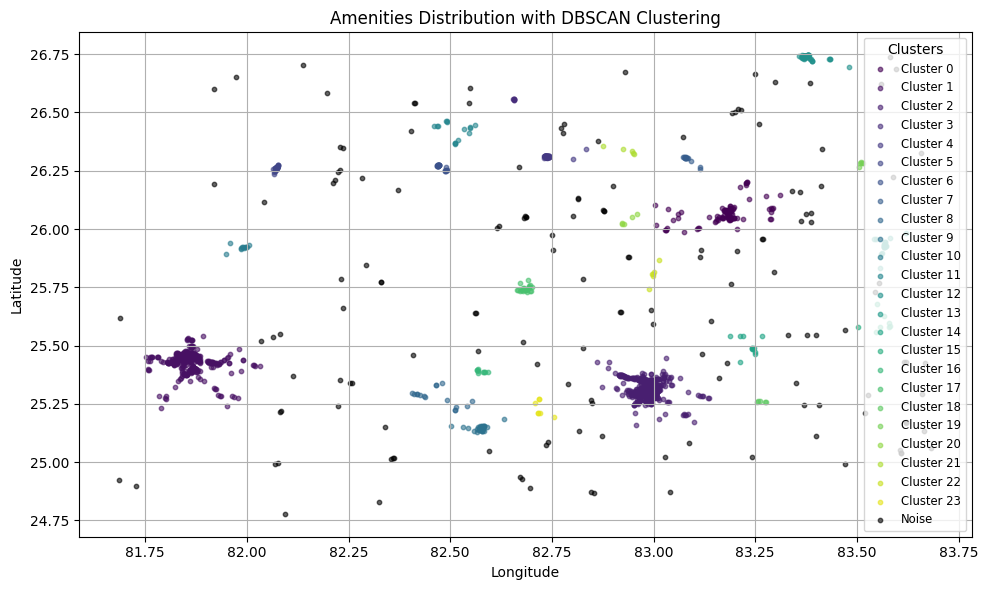

In [ ]:
import csv
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

def cluster_amenities_dbscan(filename):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.06, min_samples=5)  # Adjust eps and min_samples as needed
    labels = dbscan.fit_predict(X)

    # Plot the clusters
    plt.figure(figsize=(10, 6))

    # Create a color map
    unique_labels = set(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        if label == -1:
            # Noise points are colored in black
            plt.scatter(X[labels == label, 1], X[labels == label, 0], c='black', alpha=0.6, s=10, label='Noise')
        else:
            plt.scatter(X[labels == label, 1], X[labels == label, 0], c=color, alpha=0.6, s=10, label=f'Cluster {label}')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Amenities Distribution with DBSCAN Clustering')
    plt.grid(True)

    plt.legend(loc='upper right', fontsize='small', title='Clusters')
    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file
cluster_amenities_dbscan('amenities_jaunpur_filtered.csv')


In [ ]:
pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.7 MB/s eta 0:00:00


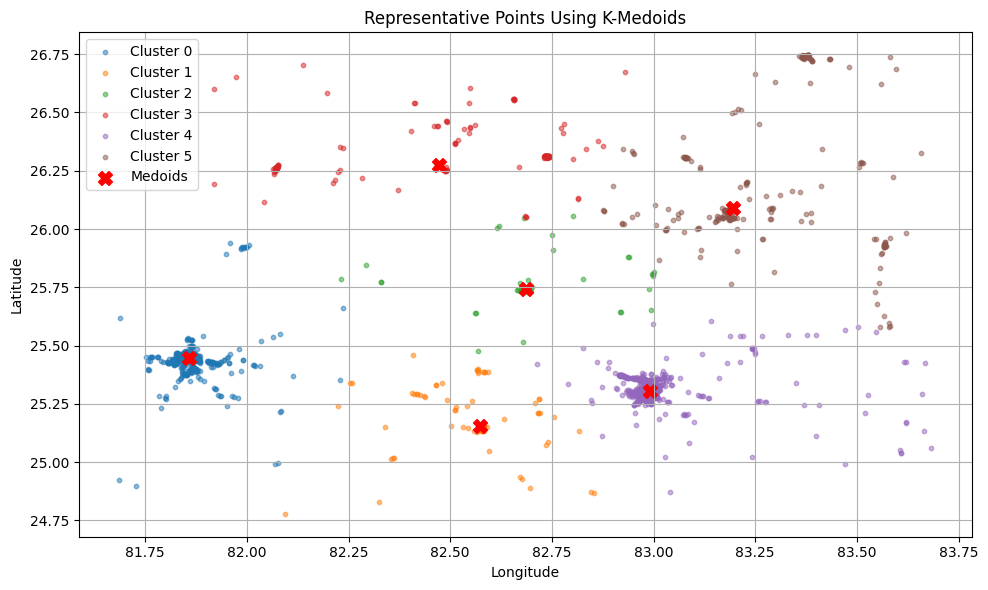

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

def select_representative_points_kmedoids(filename, n_clusters):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    labels = kmedoids.fit_predict(X)

    # Plot the data with selected representative points
    plt.figure(figsize=(10, 6))

    for label in np.unique(labels):
        plt.scatter(X[labels == label, 1], X[labels == label, 0], alpha=0.5, s=10, label=f'Cluster {label}')

    # Mark the medoids
    plt.scatter(kmedoids.cluster_centers_[:, 1], kmedoids.cluster_centers_[:, 0], c='red', marker='X', s=100, label='Medoids')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Representative Points Using K-Medoids')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file and specify the number of clusters
select_representative_points_kmedoids('amenities_jaunpur_filtered.csv', n_clusters=6)


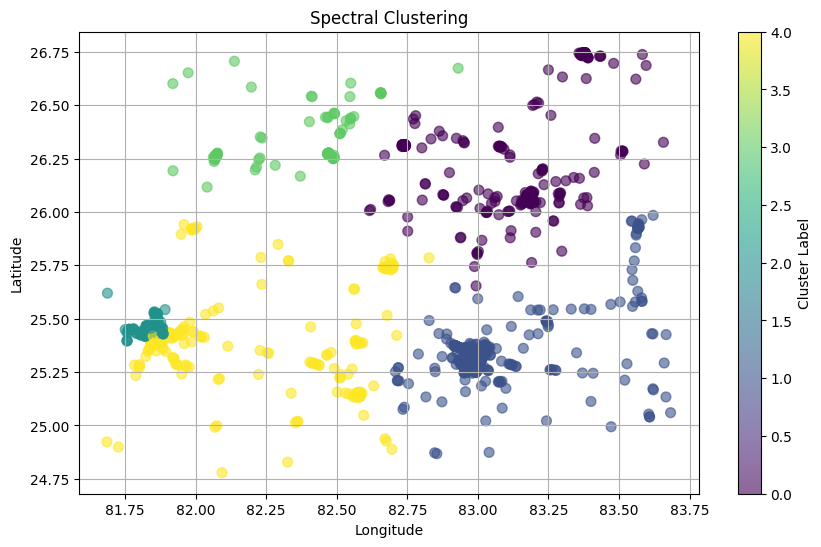

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Load the dataset
df = pd.read_csv('amenities_jaunpur_filtered.csv')

# Select features for clustering (assuming 'Latitude' and 'Longitude' are present)
X = df[['Latitude', 'Longitude']].values

# Apply Spectral Clustering
n_clusters = 5  # Specify the number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral_clustering.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 0], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.title('Spectral Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


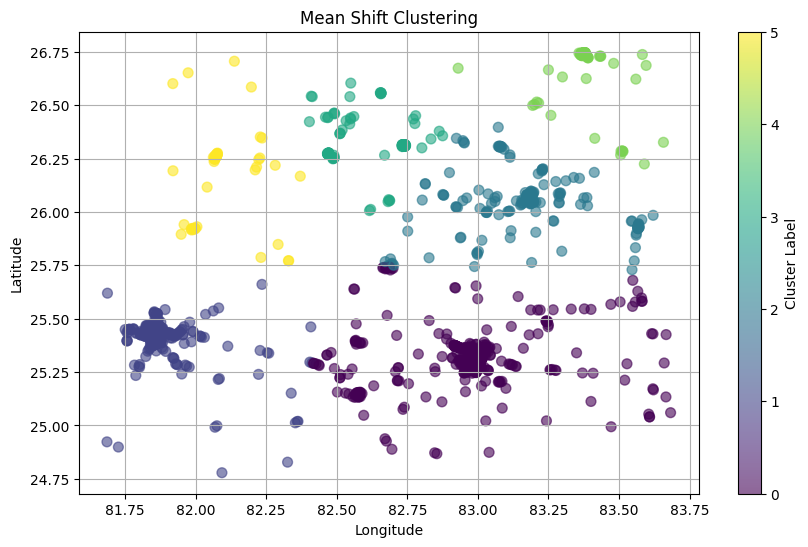

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

# Load the dataset
df = pd.read_csv('amenities_jaunpur_filtered.csv')

# Select features for clustering (assuming 'Latitude' and 'Longitude' are present)
X = df[['Latitude', 'Longitude']].values

# Apply Mean Shift Clustering
mean_shift = MeanShift()
labels = mean_shift.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 0], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.title('Mean Shift Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


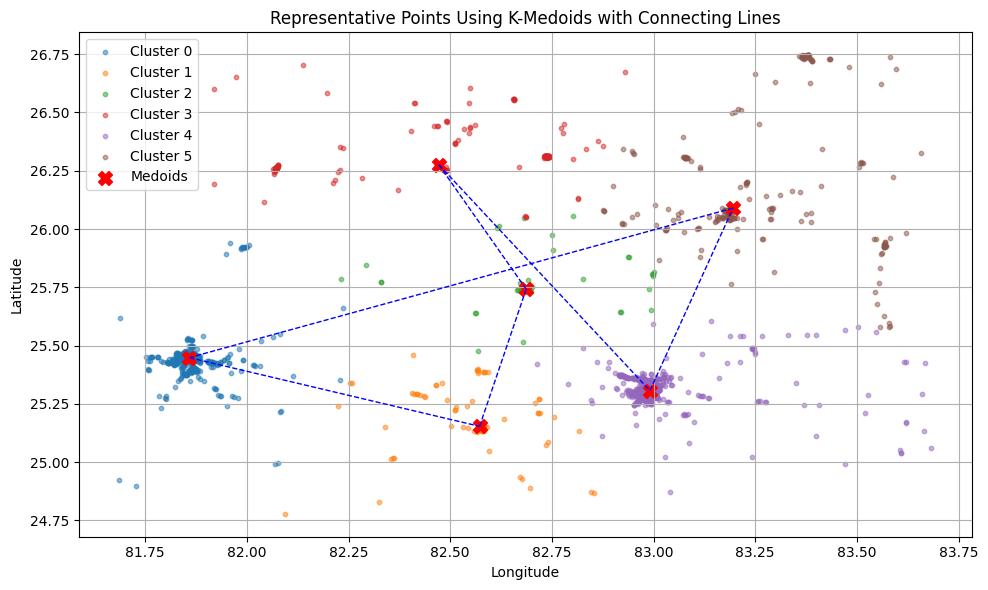

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

def select_representative_points_kmedoids(filename, n_clusters):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    labels = kmedoids.fit_predict(X)

    # Plot the data with selected representative points
    plt.figure(figsize=(10, 6))

    # Scatter plot for clusters
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 1], X[labels == label, 0], alpha=0.5, s=10, label=f'Cluster {label}')

    # Mark the medoids
    medoid_coords = kmedoids.cluster_centers_
    plt.scatter(medoid_coords[:, 1], medoid_coords[:, 0], c='red', marker='X', s=100, label='Medoids')

    # Draw lines between medoids
    for i in range(len(medoid_coords)):
        next_index = (i + 1) % len(medoid_coords)  # Connect to the next medoid, and wrap around
        plt.plot([medoid_coords[i, 1], medoid_coords[next_index, 1]],
                 [medoid_coords[i, 0], medoid_coords[next_index, 0]],
                 color='blue', linestyle='--', linewidth=1)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Representative Points Using K-Medoids with Connecting Lines')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file and specify the number of clusters
select_representative_points_kmedoids('amenities_jaunpur_filtered.csv', n_clusters=6)


Number of clusters: 2, Silhouette Score: 0.6237192243319465
Number of clusters: 3, Silhouette Score: 0.41675167299120847
Number of clusters: 4, Silhouette Score: 0.6891481110544041
Number of clusters: 5, Silhouette Score: 0.7129973301347923
Number of clusters: 6, Silhouette Score: 0.718860588974947
Number of clusters: 7, Silhouette Score: 0.5331438567235054
Number of clusters: 8, Silhouette Score: 0.46856861370261893
Number of clusters: 9, Silhouette Score: 0.46338925454190716
Number of clusters: 10, Silhouette Score: 0.42951878322289927


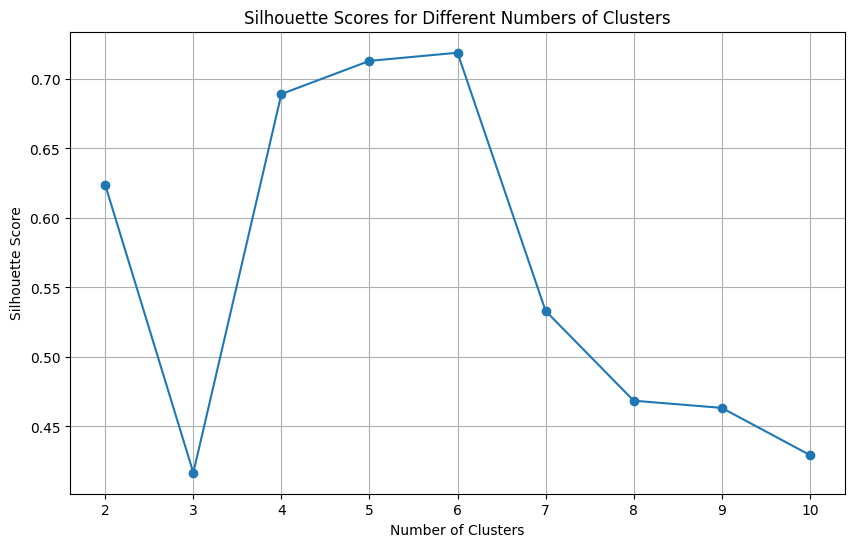

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth."""
    R = 6371.0  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlamb = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlamb / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

def optimize_kmedoids(filename, min_clusters=2, max_clusters=10):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    silhouette_scores = []
    cluster_range = range(min_clusters, max_clusters + 1)

    # Test different numbers of clusters
    for n_clusters in cluster_range:
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
        labels = kmedoids.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

    # Plotting the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Call the function with the path to your CSV file
optimize_kmedoids('amenities_jaunpur_filtered.csv', min_clusters=2, max_clusters=10)


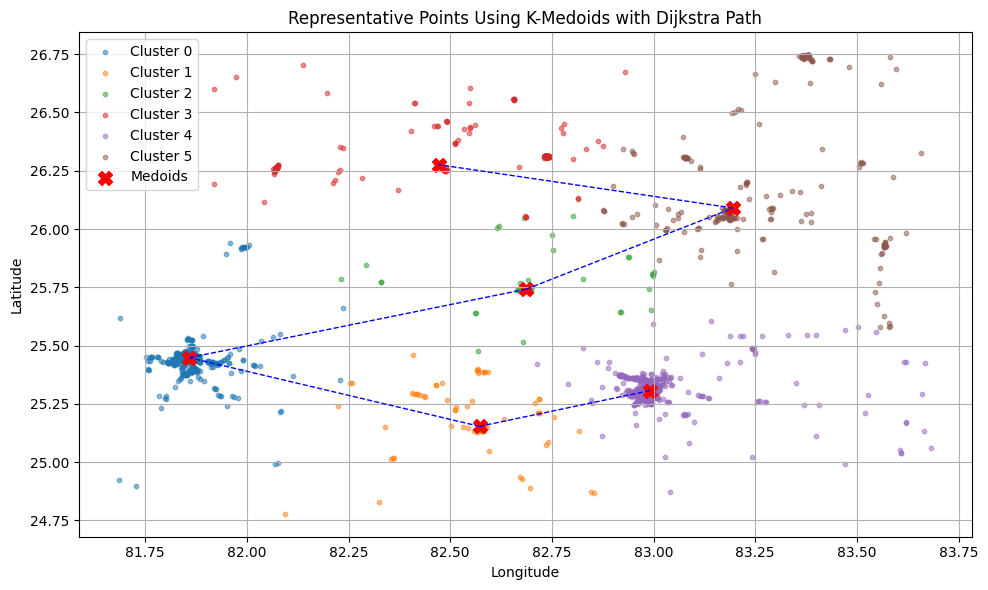

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import networkx as nx

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth."""
    R = 6371.0  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlamb = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlamb / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

def select_representative_points_kmedoids(filename, n_clusters):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    labels = kmedoids.fit_predict(X)

    # Extract medoid coordinates
    medoid_coords = kmedoids.cluster_centers_

    # Create a graph to represent distances between medoids
    G = nx.Graph()

    # Calculate distances between all medoids and add edges to the graph
    for i in range(len(medoid_coords)):
        for j in range(i + 1, len(medoid_coords)):
            dist = haversine(medoid_coords[i, 0], medoid_coords[i, 1],
                             medoid_coords[j, 0], medoid_coords[j, 1])
            G.add_edge(i, j, weight=dist)

    # Use Dijkstra's algorithm to find the shortest path connecting all medoids
    shortest_path = nx.approximation.traveling_salesman_problem(G, cycle=False)  # Set cycle to False

    # Plot the data with selected representative points
    plt.figure(figsize=(10, 6))

    # Scatter plot for clusters
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 1], X[labels == label, 0], alpha=0.5, s=10, label=f'Cluster {label}')

    # Mark the medoids
    plt.scatter(medoid_coords[:, 1], medoid_coords[:, 0], c='red', marker='X', s=100, label='Medoids')

    # Draw lines between medoids based on Dijkstra's algorithm path
    for i in range(len(shortest_path) - 1):  # Do not close the loop
        start = shortest_path[i]
        end = shortest_path[i + 1]
        plt.plot([medoid_coords[start, 1], medoid_coords[end, 1]],
                 [medoid_coords[start, 0], medoid_coords[end, 0]],
                 color='blue', linestyle='--', linewidth=1)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Representative Points Using K-Medoids with Dijkstra Path')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file and specify the number of clusters
select_representative_points_kmedoids('amenities_jaunpur_filtered.csv', n_clusters=6)


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


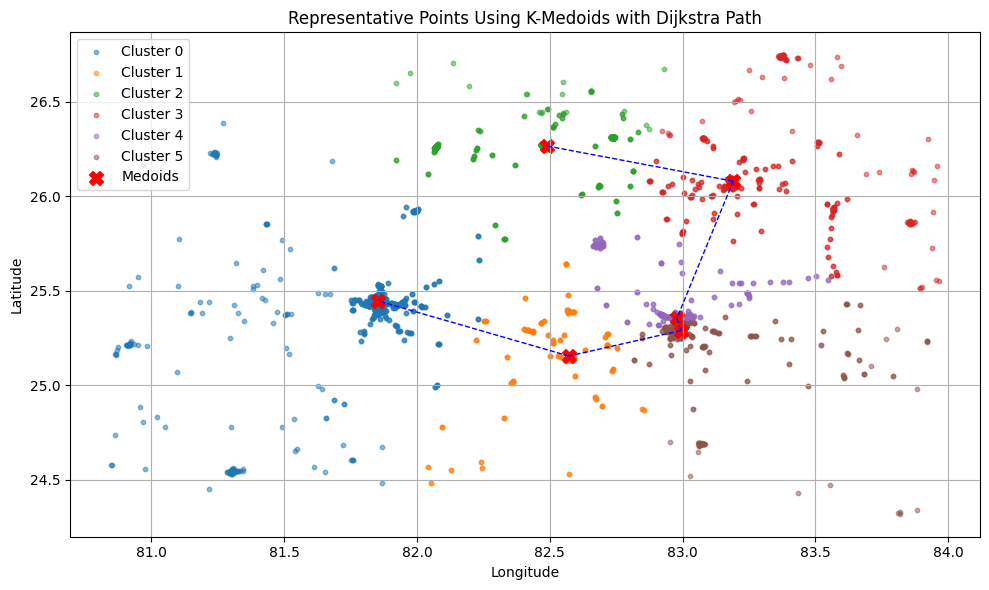

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import networkx as nx

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth."""
    R = 6371.0  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlamb = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlamb / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

def combine_csv_files(filenames, output_filename):
    combined_data = []

    # Read data from each file and store it in combined_data
    for filename in filenames:
        with open(filename, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                lat = float(row['Latitude'])
                lon = float(row['Longitude'])
                combined_data.append([lat, lon])

    # Write the combined data to a new CSV file
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Latitude', 'Longitude'])  # Write the header
        writer.writerows(combined_data)

    return output_filename

def select_representative_points_kmedoids(filename, n_clusters):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    labels = kmedoids.fit_predict(X)

    # Extract medoid coordinates
    medoid_coords = kmedoids.cluster_centers_

    # Create a graph to represent distances between medoids
    G = nx.Graph()

    # Calculate distances between all medoids and add edges to the graph
    for i in range(len(medoid_coords)):
        for j in range(i + 1, len(medoid_coords)):
            dist = haversine(medoid_coords[i, 0], medoid_coords[i, 1],
                             medoid_coords[j, 0], medoid_coords[j, 1])
            G.add_edge(i, j, weight=dist)

    # Use Dijkstra's algorithm to find the shortest path connecting all medoids
    shortest_path = nx.approximation.traveling_salesman_problem(G, cycle=False)

    # Plot the data with selected representative points
    plt.figure(figsize=(10, 6))

    # Scatter plot for clusters
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 1], X[labels == label, 0], alpha=0.5, s=10, label=f'Cluster {label}')

    # Mark the medoids
    plt.scatter(medoid_coords[:, 1], medoid_coords[:, 0], c='red', marker='X', s=100, label='Medoids')

    # Draw lines between medoids based on Dijkstra's algorithm path
    for i in range(len(shortest_path) - 1):  # Do not close the loop
        start = shortest_path[i]
        end = shortest_path[i + 1]
        plt.plot([medoid_coords[start, 1], medoid_coords[end, 1]],
                 [medoid_coords[start, 0], medoid_coords[end, 0]],
                 color='blue', linestyle='--', linewidth=1)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Representative Points Using K-Medoids with Dijkstra Path')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Combine the three files into one dataset
combined_filename = combine_csv_files(
    ['amenities_jaunpur_filtered.csv', 'amenities_varanasi_filtered.csv', 'amenities_prayagraj_filtered.csv'],
    'combined_amenities.csv'
)

# Perform K-Medoids clustering on the combined dataset and plot the result
select_representative_points_kmedoids('combined_amenities.csv', n_clusters=6)


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


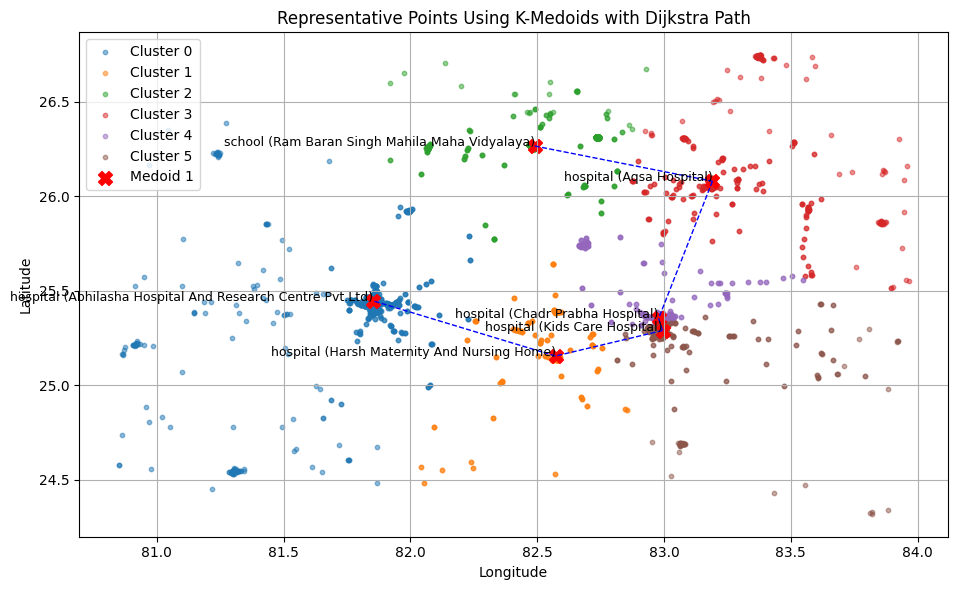

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import networkx as nx

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth."""
    R = 6371.0  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlamb = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlamb / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

def combine_csv_files(filenames, output_filename):
    combined_data = []

    # Read data from each file and store it in combined_data
    for filename in filenames:
        with open(filename, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                lat = float(row['Latitude'])
                lon = float(row['Longitude'])
                name = row.get('Name', 'Unknown')  # Default to 'Unknown' if not present
                amenity_type = row.get('Amenity Type', 'Unknown')  # Default to 'Unknown' if not present
                combined_data.append([name, amenity_type,lat, lon])

    # Write the combined data to a new CSV file
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Amenity Type','Name','Latitude', 'Longitude' ])  # Write the header
        writer.writerows(combined_data)

    return output_filename

def select_representative_points_kmedoids(filename, n_clusters):
    # List to store latitude, longitude, and labels
    coordinates = []
    labels_info = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            name = row['Name']
            amenity_type = row['Amenity Type']
            coordinates.append([lat, lon])
            labels_info.append(f"{name} ({amenity_type})")

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    labels = kmedoids.fit_predict(X)

    # Extract medoid coordinates
    medoid_coords = kmedoids.cluster_centers_

    # Create a graph to represent distances between medoids
    G = nx.Graph()

    # Calculate distances between all medoids and add edges to the graph
    for i in range(len(medoid_coords)):
        for j in range(i + 1, len(medoid_coords)):
            dist = haversine(medoid_coords[i, 0], medoid_coords[i, 1],
                             medoid_coords[j, 0], medoid_coords[j, 1])
            G.add_edge(i, j, weight=dist)

    # Use Dijkstra's algorithm to find the shortest path connecting all medoids
    shortest_path = nx.approximation.traveling_salesman_problem(G, cycle=False)

    # Plot the data with selected representative points
    plt.figure(figsize=(10, 6))

    # Scatter plot for clusters
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 1], X[labels == label, 0], alpha=0.5, s=10, label=f'Cluster {label}')

    # Mark the medoids and display their names
    for idx, (lat, lon) in enumerate(medoid_coords):
        plt.scatter(lon, lat, c='red', marker='X', s=100, label=f'Medoid {idx+1}' if idx == 0 else "")
        plt.text(lon, lat, labels_info[kmedoids.medoid_indices_[idx]], fontsize=9, ha='right')

    # Draw lines between medoids based on Dijkstra's algorithm path
    for i in range(len(shortest_path) - 1):  # Do not close the loop
        start = shortest_path[i]
        end = shortest_path[i + 1]
        plt.plot([medoid_coords[start, 1], medoid_coords[end, 1]],
                 [medoid_coords[start, 0], medoid_coords[end, 0]],
                 color='blue', linestyle='--', linewidth=1)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Representative Points Using K-Medoids with Dijkstra Path')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Combine the three files into one dataset
combined_filename = combine_csv_files(
    ['amenities_jaunpur_filtered.csv', 'amenities_varanasi_filtered.csv', 'amenities_prayagraj_filtered.csv'],
    'combined_amenities.csv'
)

# Perform K-Medoids clustering on the combined dataset and plot the result
select_representative_points_kmedoids('combined_amenities.csv', n_clusters=6)


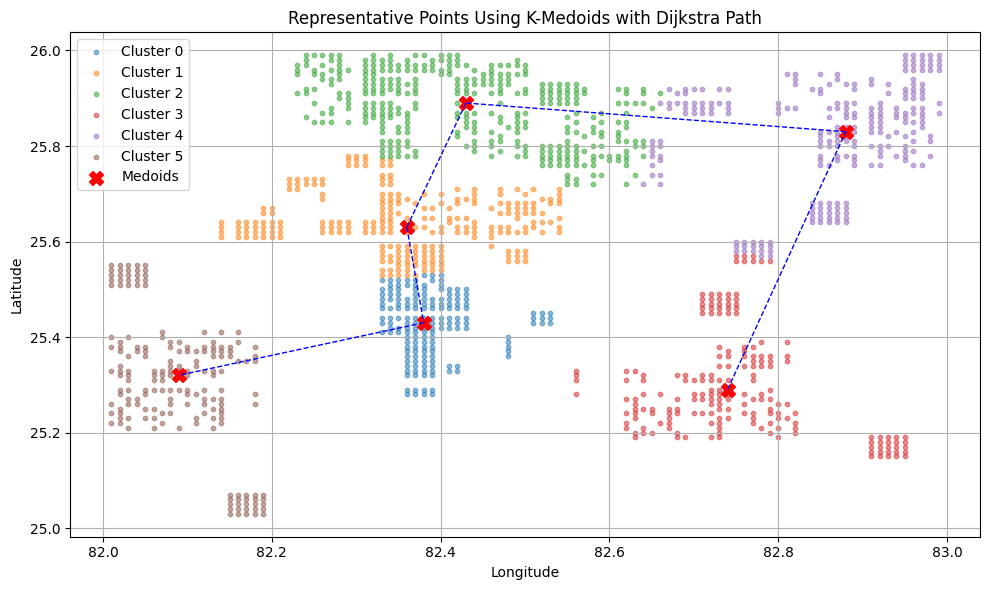

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import networkx as nx

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth."""
    R = 6371.0  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlamb = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlamb / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

def select_representative_points_kmedoids(filename, n_clusters):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    labels = kmedoids.fit_predict(X)

    # Extract medoid coordinates
    medoid_coords = kmedoids.cluster_centers_

    # Create a graph to represent distances between medoids
    G = nx.Graph()

    # Calculate distances between all medoids and add edges to the graph
    for i in range(len(medoid_coords)):
        for j in range(i + 1, len(medoid_coords)):
            dist = haversine(medoid_coords[i, 0], medoid_coords[i, 1],
                             medoid_coords[j, 0], medoid_coords[j, 1])
            G.add_edge(i, j, weight=dist)

    # Use Dijkstra's algorithm to find the shortest path connecting all medoids
    shortest_path = nx.approximation.traveling_salesman_problem(G, cycle=False)  # Set cycle to False

    # Plot the data with selected representative points
    plt.figure(figsize=(10, 6))

    # Scatter plot for clusters
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 1], X[labels == label, 0], alpha=0.5, s=10, label=f'Cluster {label}')

    # Mark the medoids
    plt.scatter(medoid_coords[:, 1], medoid_coords[:, 0], c='red', marker='X', s=100, label='Medoids')

    # Draw lines between medoids based on Dijkstra's algorithm path
    for i in range(len(shortest_path) - 1):  # Do not close the loop
        start = shortest_path[i]
        end = shortest_path[i + 1]
        plt.plot([medoid_coords[start, 1], medoid_coords[end, 1]],
                 [medoid_coords[start, 0], medoid_coords[end, 0]],
                 color='blue', linestyle='--', linewidth=1)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Representative Points Using K-Medoids with Dijkstra Path')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with the path to your CSV file and specify the number of clusters
select_representative_points_kmedoids('amenities.csv', n_clusters=6)


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Number of clusters: 2, Silhouette Score: Not valid (only one cluster)


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Number of clusters: 3, Silhouette Score: Not valid (only one cluster)


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Number of clusters: 4, Silhouette Score: 0.5777475870065402


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


Number of clusters: 5, Silhouette Score: 0.6285749876821375


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


Number of clusters: 6, Silhouette Score: 0.4614766932776152


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(


Number of clusters: 7, Silhouette Score: 0.42219823579597077


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(


Number of clusters: 8, Silhouette Score: 0.40033308931281136


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 8 

Number of clusters: 9, Silhouette Score: 0.39088088353284656


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 8 

Number of clusters: 10, Silhouette Score: 0.4093248642290497


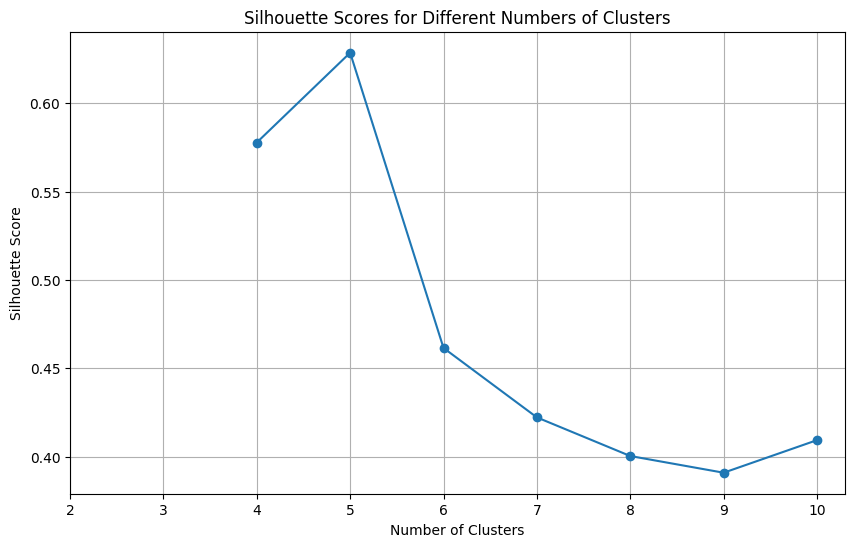

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth."""
    R = 6371.0  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlamb = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlamb / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

def optimize_kmedoids(filename, min_clusters=2, max_clusters=10):
    # List to store latitude and longitude
    coordinates = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            coordinates.append([lat, lon])

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    silhouette_scores = []
    cluster_range = range(min_clusters, max_clusters + 1)

    # Test different numbers of clusters
    for n_clusters in cluster_range:
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
        labels = kmedoids.fit_predict(X)

        # Check if there are at least 2 unique labels before calculating the silhouette score
        num_labels = len(set(labels))
        if num_labels > 1:
            silhouette_avg = silhouette_score(X, labels)
            silhouette_scores.append(silhouette_avg)
            print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")
        else:
            silhouette_scores.append(float('-inf'))  # Use -inf to indicate invalid scores for plotting
            print(f"Number of clusters: {n_clusters}, Silhouette Score: Not valid (only one cluster)")

    # Plotting the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Call the function with the path to your CSV file
optimize_kmedoids('combined_amenities.csv', min_clusters=2, max_clusters=10)


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


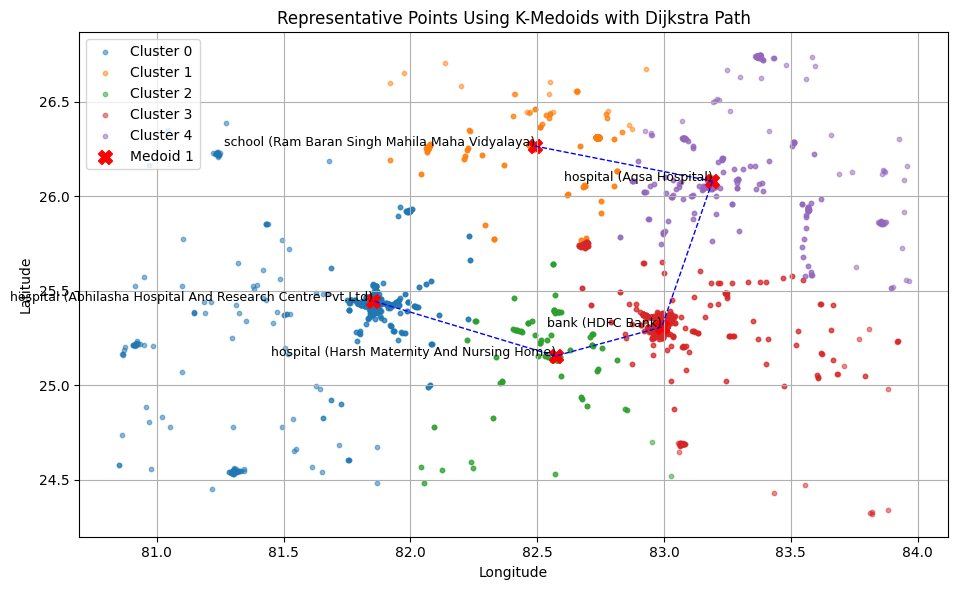

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import networkx as nx

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth."""
    R = 6371.0  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlamb = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlamb / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

def combine_csv_files(filenames, output_filename):
    combined_data = []

    # Read data from each file and store it in combined_data
    for filename in filenames:
        with open(filename, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                lat = float(row['Latitude'])
                lon = float(row['Longitude'])
                name = row.get('Name', 'Unknown')  # Default to 'Unknown' if not present
                amenity_type = row.get('Amenity Type', 'Unknown')  # Default to 'Unknown' if not present
                combined_data.append([name, amenity_type,lat, lon])

    # Write the combined data to a new CSV file
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Amenity Type','Name','Latitude', 'Longitude' ])  # Write the header
        writer.writerows(combined_data)

    return output_filename

def select_representative_points_kmedoids(filename, n_clusters):
    # List to store latitude, longitude, and labels
    coordinates = []
    labels_info = []

    # Read the data from the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            name = row['Name']
            amenity_type = row['Amenity Type']
            coordinates.append([lat, lon])
            labels_info.append(f"{name} ({amenity_type})")

    # Convert to numpy array for clustering
    X = np.array(coordinates)

    # Apply K-Medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    labels = kmedoids.fit_predict(X)

    # Extract medoid coordinates
    medoid_coords = kmedoids.cluster_centers_

    # Create a graph to represent distances between medoids
    G = nx.Graph()

    # Calculate distances between all medoids and add edges to the graph
    for i in range(len(medoid_coords)):
        for j in range(i + 1, len(medoid_coords)):
            dist = haversine(medoid_coords[i, 0], medoid_coords[i, 1],
                             medoid_coords[j, 0], medoid_coords[j, 1])
            G.add_edge(i, j, weight=dist)

    # Use Dijkstra's algorithm to find the shortest path connecting all medoids
    shortest_path = nx.approximation.traveling_salesman_problem(G, cycle=False)

    # Plot the data with selected representative points
    plt.figure(figsize=(10, 6))

    # Scatter plot for clusters
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 1], X[labels == label, 0], alpha=0.5, s=10, label=f'Cluster {label}')

    # Mark the medoids and display their names
    for idx, (lat, lon) in enumerate(medoid_coords):
        plt.scatter(lon, lat, c='red', marker='X', s=100, label=f'Medoid {idx+1}' if idx == 0 else "")
        plt.text(lon, lat, labels_info[kmedoids.medoid_indices_[idx]], fontsize=9, ha='right')

    # Draw lines between medoids based on Dijkstra's algorithm path
    for i in range(len(shortest_path) - 1):  # Do not close the loop
        start = shortest_path[i]
        end = shortest_path[i + 1]
        plt.plot([medoid_coords[start, 1], medoid_coords[end, 1]],
                 [medoid_coords[start, 0], medoid_coords[end, 0]],
                 color='blue', linestyle='--', linewidth=1)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Representative Points Using K-Medoids with Dijkstra Path')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Combine the three files into one dataset
combined_filename = combine_csv_files(
    ['amenities_jaunpur_filtered.csv', 'amenities_varanasi_filtered.csv', 'amenities_prayagraj_filtered.csv'],
    'combined_amenities.csv'
)

# Perform K-Medoids clustering on the combined dataset and plot the result
select_representative_points_kmedoids('combined_amenities.csv', n_clusters=5)
